Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLev

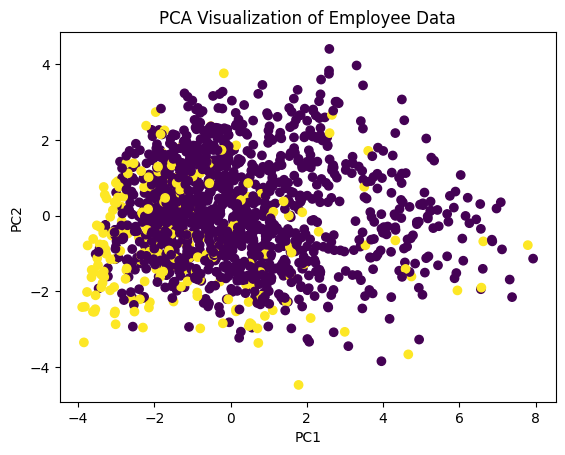

Top 10 Selected Features: ['Age', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
Original Features: 35
After Feature Selection: 10


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 7 20 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [6]:
# Feature Engineering Assignment
# Dataset: IBM HR Analytics Employee Attrition Dataset
# Author: [Pavansubhash]
# Submitted By: Saumyajeet Singh Bhati
# Branch: CSE(AIML)
# PRN: 202401110065

# STEP 1: Import Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
import matplotlib.pyplot as plt

# STEP 2: Load the Dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("Shape:", df.shape)
df.head()

# STEP 3: Explore the Dataset

print(df.info())
print(df.describe())
print(df.isnull().sum())

# STEP 4: Handle Missing Values

# (Dataset has no missing values, but demonstrating process)
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# STEP 5: Encode Categorical Variables

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


# STEP 6: Feature Scaling

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# STEP 7: Dimensionality Reduction (PCA)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Attrition'], cmap='viridis')
plt.title("PCA Visualization of Employee Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# STEP 8: Feature Selection

# 1. Remove low-variance features
var_thresh = VarianceThreshold(threshold=0.01)
df_var = var_thresh.fit_transform(df_scaled)

# 2. Select top K best features using ANOVA F-test
X = df_scaled.drop('Attrition', axis=1)
y = df_scaled['Attrition']
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Top 10 Selected Features:", selected_features.tolist())

# STEP 9: Summary

print("Original Features:", df.shape[1])
print("After Feature Selection:", X_new.shape[1])
